In [1]:
import numpy as np
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u

%matplotlib inline

In [2]:
m67 = pd.read_csv("psf_mag.csv", comment='#')
m67_radec = Table.read("radec.csv", format='ascii')
m67_psf_smaller = pd.read_csv("psf_mag_smaller.csv", comment='#')

In [3]:
m67_radec

ra,dec
float64,float64
132.94540009,11.75340699
132.95227356,11.75660329
132.9449301,11.7592518
132.94569734,11.76056457
132.95456833,11.7726302
132.95738661,11.77342045
132.94914532,11.76515131
132.95079972,11.76450323
132.95262514,11.76787324


In [4]:
u = m67['psfMag_u']
g = m67['psfMag_g']
r = m67['psfMag_r']
i = m67['psfMag_i']
z = m67['psfMag_z']

### Plot of u-g vs g

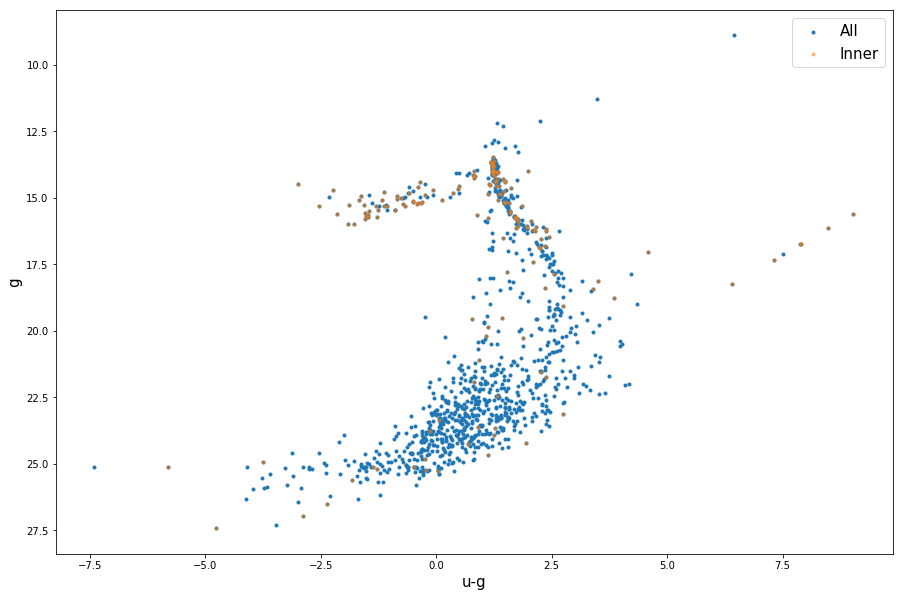

In [39]:
u_g = u - g

plt.figure(figsize=(15, 10))
plt.scatter(u_g, g, marker=".", label="All")
plt.scatter(m67_psf_smaller['psfMag_u'] - m67_psf_smaller['psfMag_g'], 
            m67_psf_smaller['psfMag_g'],
            marker=".", label="Inner", alpha=0.5)
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('u-g', fontsize=15)
plt.ylabel('g', fontsize=15)
plt.legend(loc=1, fontsize=15);

### Plot of r-i vs r

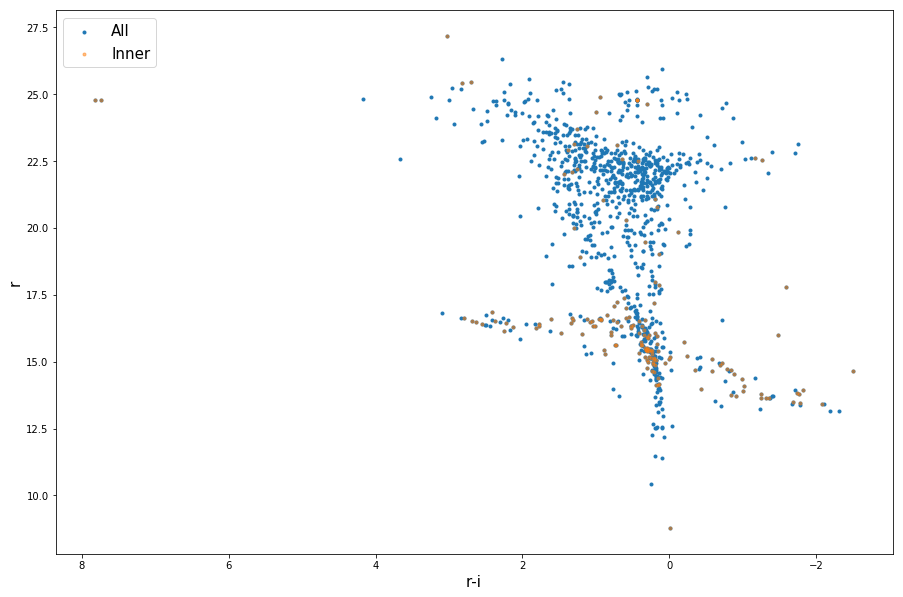

In [6]:
plt.figure(figsize=(15, 10))
plt.scatter(m67['psfMag_r'] - m67['psfMag_i'], 
            m67['psfMag_r'], 
            marker=".", label="All")
plt.scatter(m67_psf_smaller['psfMag_r'] - m67_psf_smaller['psfMag_i'],
            m67_psf_smaller['psfMag_r'],
            marker=".", label="Inner", alpha=0.5)
plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
plt.xlabel('r-i', fontsize=15)
plt.ylabel('r', fontsize=15)
plt.legend(loc=2, fontsize=15);

### Plot u-g vs r-i

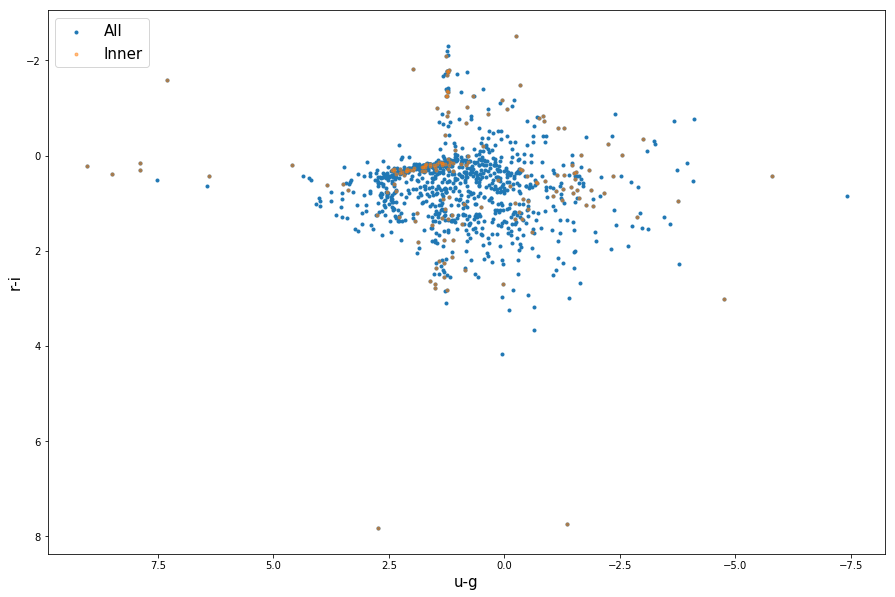

In [7]:
plt.figure(figsize=(15, 10))
plt.scatter(m67['psfMag_u'] - m67['psfMag_g'],
            m67['psfMag_r'] - m67['psfMag_i'],
            marker=".", label="All")
plt.scatter(m67_psf_smaller['psfMag_u'] - m67_psf_smaller['psfMag_g'], 
            m67_psf_smaller['psfMag_r'] - m67_psf_smaller['psfMag_i'],
            marker=".", label="Inner", alpha=0.5)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('u-g', fontsize=15)
plt.ylabel('r-i', fontsize=15)
plt.legend(loc=2, fontsize=15);

### Plot g-i vs r-z

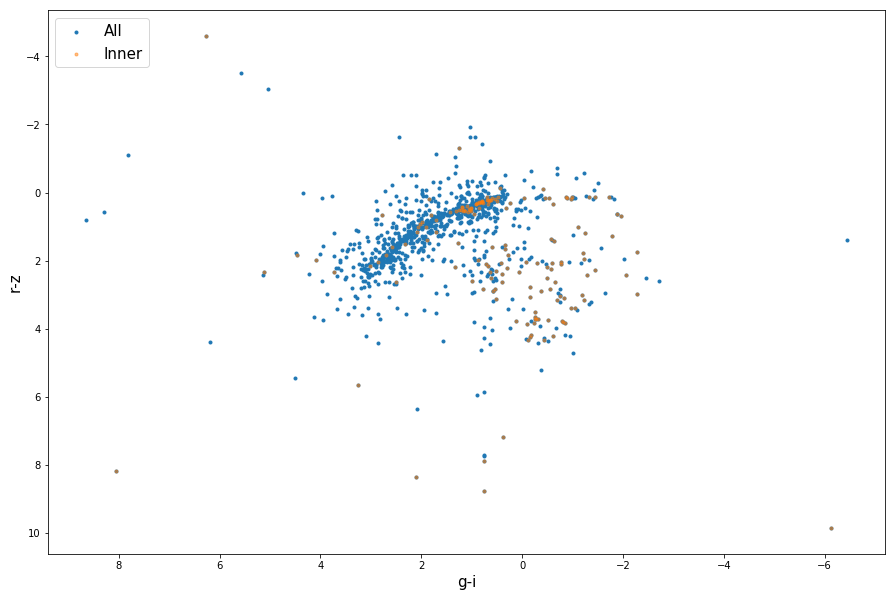

In [8]:
plt.figure(figsize=(15, 10))
plt.scatter(m67['psfMag_g'] - m67['psfMag_i'],
            m67['psfMag_r'] - m67['psfMag_z'],
            marker=".", label="All")
plt.scatter(m67_psf_smaller['psfMag_g'] - m67_psf_smaller['psfMag_i'], 
            m67_psf_smaller['psfMag_r'] - m67_psf_smaller['psfMag_z'],
            marker=".", label="Inner", alpha=0.5)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('g-i', fontsize=15)
plt.ylabel('r-z', fontsize=15)
plt.legend(loc=2, fontsize=15);

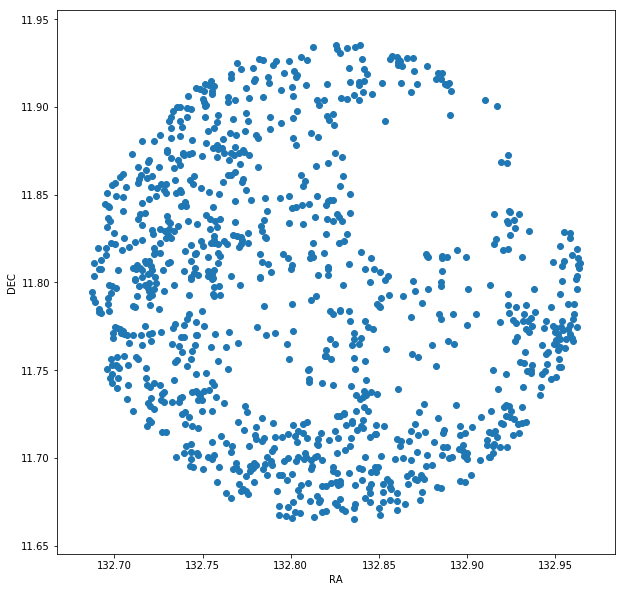

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(m67_radec['ra'], m67_radec['dec'])
plt.xlabel('RA')
plt.ylabel('DEC');

To get ther inner part of the stars, find the difference in the max and min values of the RA and DEC and subtract the quarter from each side.

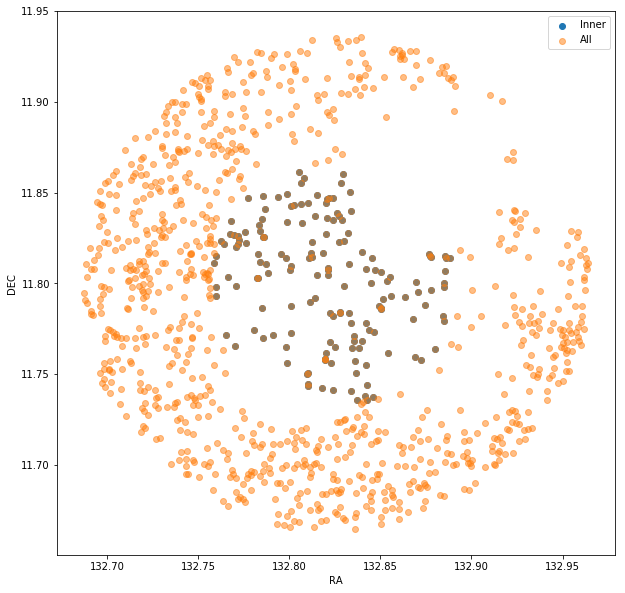

In [10]:
m67_smaller = pd.read_csv("radec_smaller.csv", comment='#')

plt.figure(figsize=(10, 10))
plt.scatter(m67_smaller['ra'], m67_smaller['dec'], label="Inner")
plt.scatter(m67_radec['ra'], m67_radec['dec'], alpha=0.5, label="All")
plt.legend(loc=1)
plt.xlabel('RA')
plt.ylabel('DEC');

In [11]:
twomass = Table.read('irsa_catalog_search_results.tbl', format='ascii')

In [12]:
cross_match = Table.read('CDS_Crossmatch_2MASS.csv', format='ascii')
cross_match

angDist,ra,dec,2MASS,RAJ2000,DEJ2000,errHalfMaj,errHalfMin,errPosAng,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD
float64,float64,float64,str16,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,str3,int32,int32,float64
0.133559,132.94540009,11.75340699,08514690+1145123,132.945432,11.753427,0.07,0.07,90,15.334,14.746,14.413,0.051,0.062,0.068,AAA,222,0,2450768.9552
0.298888,132.95915498,11.76852198,08515020+1146069,132.959181,11.768601,0.07,0.07,90,9.124,8.661,8.554,0.027,0.026,0.018,AAA,112,0,2450768.9552
0.134392,132.93142688,11.74066947,08514355+1144264,132.931464,11.740678,0.07,0.07,90,8.838,8.294,8.163,0.032,0.02,0.021,AAA,111,0,2450768.9552
0.166899,132.94151391,11.73590778,08514597+1144093,132.941557,11.735927,0.07,0.07,90,12.32,12.064,12.0,0.022,0.022,0.02,AAA,222,0,2450768.9552
0.071744,132.91138837,11.7103702,08513873+1142373,132.911402,11.710385,0.07,0.07,0,12.971,12.73,12.648,0.023,0.024,0.025,AAA,222,0,2450768.9545
0.119237,132.91521244,11.7078269,08513965+1142282,132.915242,11.707843,0.07,0.07,90,14.63,14.085,14.119,0.031,0.039,0.052,AAA,222,0,2450768.9552
0.701585,132.91940524,11.71987514,08514062+1143120,132.919278,11.720025,0.29,0.28,141,17.08,15.794,15.885,nan,0.151,0.244,UBD,22,0,2450768.9545
0.192539,132.9158366,11.71515015,08513980+1142547,132.915861,11.715198,0.07,0.07,90,13.096,12.781,12.711,0.023,0.025,0.024,AAA,222,0,2450768.9552
0.161932,132.92474322,11.72698325,08514194+1143371,132.924789,11.726987,0.07,0.07,90,11.596,11.364,11.284,0.022,0.023,0.02,AAA,222,0,2450768.9552


In [13]:
mini = cross_match['angDist'].min()
maxi = cross_match['angDist'].max()
print(mini, maxi)

0.0032 1.756523


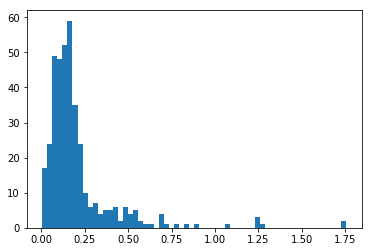

In [14]:
plt.hist(cross_match['angDist'], bins=60);

In [17]:
cross_match_second = Table.read('M67-2MASS_2.csv', format='ascii')
cross_match_second

ra,dec,err_maj,err_min,err_ang,h_m,k_m,j_m,j_h,h_k,j_k,designation,j_cmsig,j_msigcom,j_snr,h_cmsig,h_msigcom,h_snr,k_cmsig,k_msigcom,k_snr,ph_qual,rd_flg,bl_flg,cc_flg,ndet,gal_contam,mp_flg,dist,angle
float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,str16,str5,str5,str7,str5,str5,str7,str5,str5,str7,str3,int32,int32,str3,int32,int32,str8,float64,str14
132.823341,11.80454,0.11,0.11,45,11.767,11.455,14.616,--,--,--,08511760+1148163,0.02,0.023,53.2,null,null,null,null,null,null,AUU,200,100,c00,550000,0,0,17.358101,340.31838
132.829927,11.798506,0.07,0.07,90,12.247,12.182,12.566,0.319,0.065,0.384,08511918+1147546,0.017,0.021,351.6,0.018,0.02,188.4,0.018,0.02,134.5,AAA,222,111,0,666666,0,0,18.176375,107.211045
132.821257,11.80446,0.07,0.07,90,7.526,7.385,8.14,0.614,0.141,0.755,08511710+1148160,0.021,0.027,20721.9,0.011,0.018,14571.7,0.015,0.021,11153.7,AAA,111,111,0,666666,0,0,20.779064,320.597425
132.830069,11.807475,0.07,0.07,90,14.6,14.312,15.151,0.551,0.288,0.839,08511921+1148269,0.04,0.042,32.5,0.054,0.054,21.6,0.059,0.06,18.9,AAA,222,111,0,663616,0,0,32.298881,33.575189
132.815406,11.804343,0.07,0.07,90,12.965,12.955,13.244,0.279,0.01,0.289,08511569+1148156,0.021,0.024,188.3,0.026,0.027,97.2,0.025,0.026,66,AAA,222,111,ddd,666656,0,0,37.248415,294.819409
132.829189,11.789187,0.09,0.08,45,15.092,15.042,15.819,0.727,0.05,0.777,08511900+1147210,0.073,0.074,17.6,0.088,0.089,13.7,0.116,0.116,9.7,AAB,222,111,sss,150505,0,0,41.631869,159.231609
132.832875,11.810451,0.07,0.07,90,14.508,14.445,15.084,0.576,0.063,0.639,08511989+1148376,0.041,0.043,34.6,0.047,0.048,23.5,0.067,0.067,16.7,AAA,222,111,0,664606,0,0,46.750592,36.410885
132.814363,11.792049,0.07,0.07,90,11.475,11.43,11.708,0.233,0.045,0.278,08511544+1147313,0.017,0.021,774.9,0.018,0.02,383.6,0.016,0.018,268.8,AAA,222,111,0,666666,0,0,47.163533,232.635319
132.836275,11.808737,0.07,0.07,90,14.843,14.562,15.468,0.625,0.281,0.906,08512070+1148314,0.046,0.048,24.3,0.065,0.066,17.2,0.074,0.074,15,AAA,222,111,0,561606,0,0,50.674484,51.632229


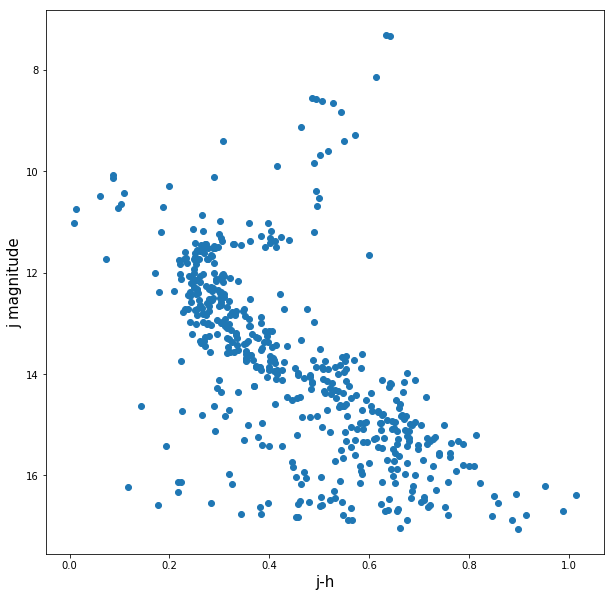

In [36]:
plt.figure(figsize=(10, 10))
plt.scatter(cross_match_second['j_h'], cross_match_second['j_m'])
plt.ylabel('j magnitude', fontsize=15)
plt.xlabel('j-h', fontsize=15)
plt.gca().invert_yaxis()

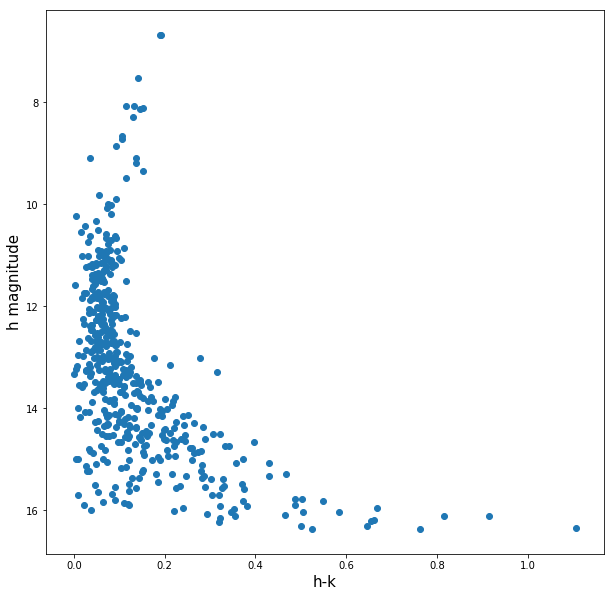

In [35]:
plt.figure(figsize=(10, 10))
plt.scatter(cross_match_second['h_k'], cross_match_second['h_m'])
plt.ylabel('h magnitude', fontsize=15)
plt.xlabel('h-k', fontsize=15)
plt.gca().invert_yaxis()

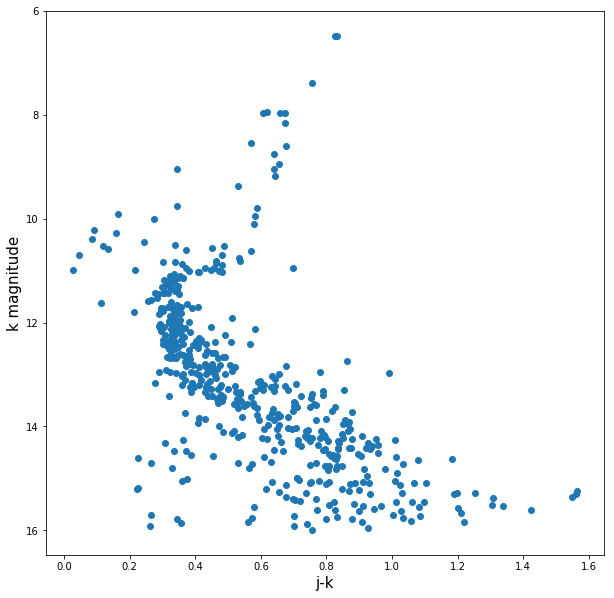

In [34]:
plt.figure(figsize=(10, 10))
plt.scatter(cross_match_second['j_k'], cross_match_second['k_m'])
plt.ylabel('k magnitude', fontsize=15)
plt.xlabel('j-k', fontsize=15)
plt.gca().invert_yaxis()

([<matplotlib.axis.XTick at 0x2313eb36b70>,
 <a list of 3 Text xticklabel objects>)

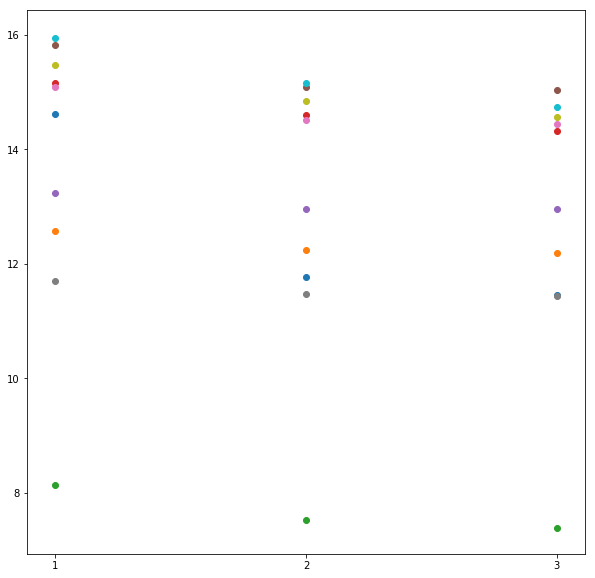

In [66]:
plt.figure(figsize=(10, 10))
for i in np.arange(10):
#     plt.figure(fontsize=15)
    plt.scatter([1, 2, 3], [cross_match_second[i]['j_m'], cross_match_second[i]['h_m'],
                                 cross_match_second[i]['k_m']])
plt.xticks([1, 2, 3], label=['j', 'h', 'k'])

In [50]:
?plt.scatter